<a href="https://colab.research.google.com/github/krzysztof-kar/ML2025/blob/main/Lab01_PCA_prdom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






### **ROZWIĄZANIE**

In [45]:

import pandas as pd
url = 'https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv'
X = pd.read_csv(url, index_col=0)

data = pd.DataFrame(X)
y=X['class']

print(X.head(5))

                  y          z  class
x                                    
 0.647689 -0.138264   3.512299      0
-0.234137 -0.234153  10.769447      0
-0.469474  0.767435  11.166721      0
-0.465730 -0.463418   3.836479      0
-1.724918 -1.913280   1.710932      0


In [46]:
import numpy as np

X = X - np.mean(X, axis=0)

X = X / np.std(X, axis=0)

U, Sigma, VT = np.linalg.svd(X)

Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)

variance_estimators = (Sigma ** 2) / (X.shape[0] - 1)

XV = U @ Sigma_full
print(XV[:5,:])

[[-1.30069339 -0.47615033  0.39843028]
 [-1.39004055 -1.61106001  0.23057344]
 [-0.93001415 -1.74171739  0.68397195]
 [-1.45284958 -0.50500734  0.24350961]
 [-2.10913815 -0.07200791 -0.38636388]]


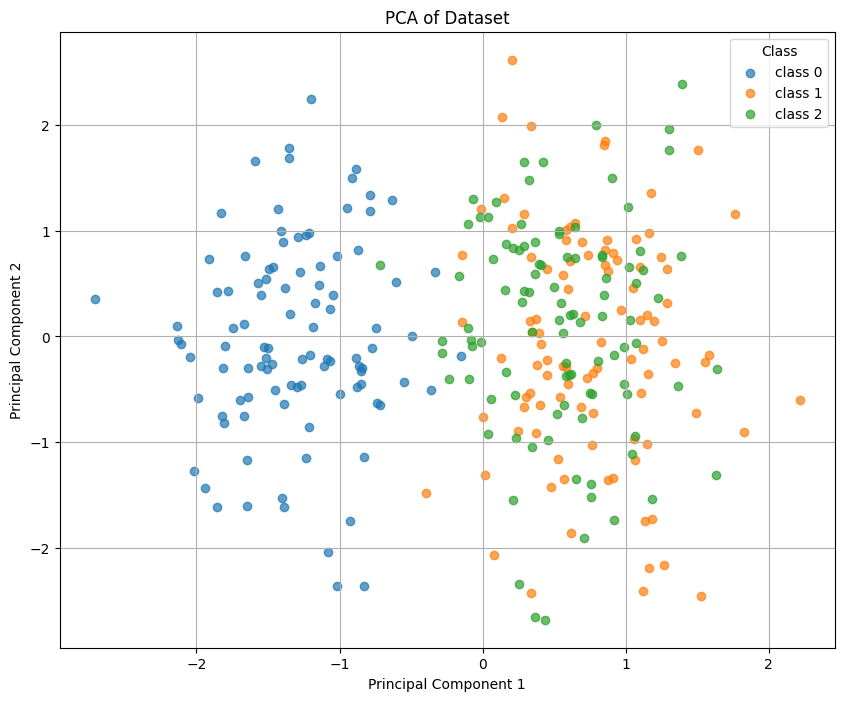

In [47]:
import matplotlib.pyplot as plt

target_names = ['class 0', 'class 1', 'class 2']


# Plot the PCA results with color coding by wine class
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(XV[y == i, 0], XV[y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset")
plt.legend(title="Class")
plt.grid(True)
plt.show()

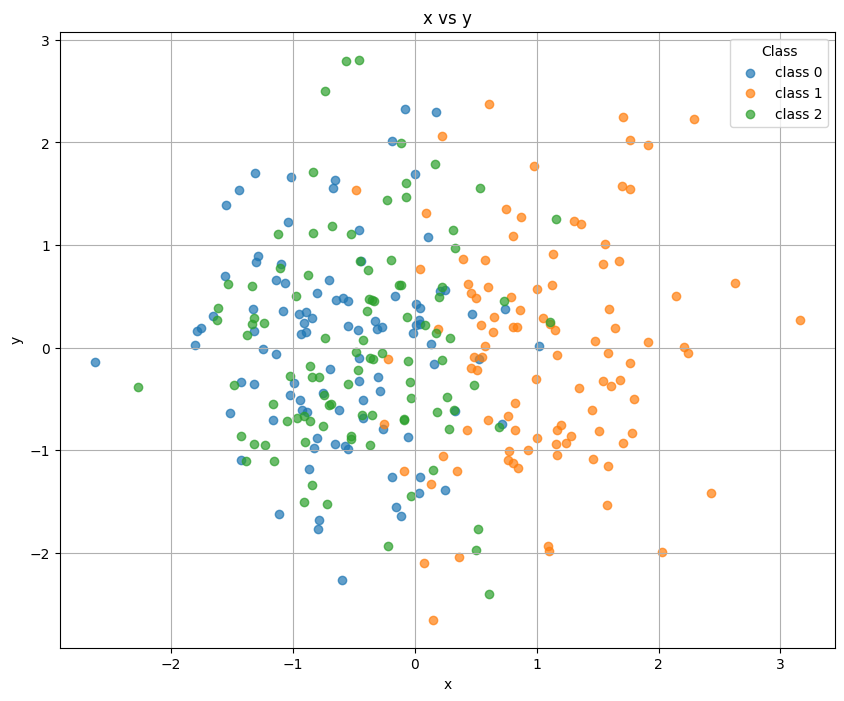

In [54]:
Xm = X.to_numpy()

plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(Xm[y == i, 0], Xm[y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.legend(title="Class")
plt.grid(True)
plt.show()

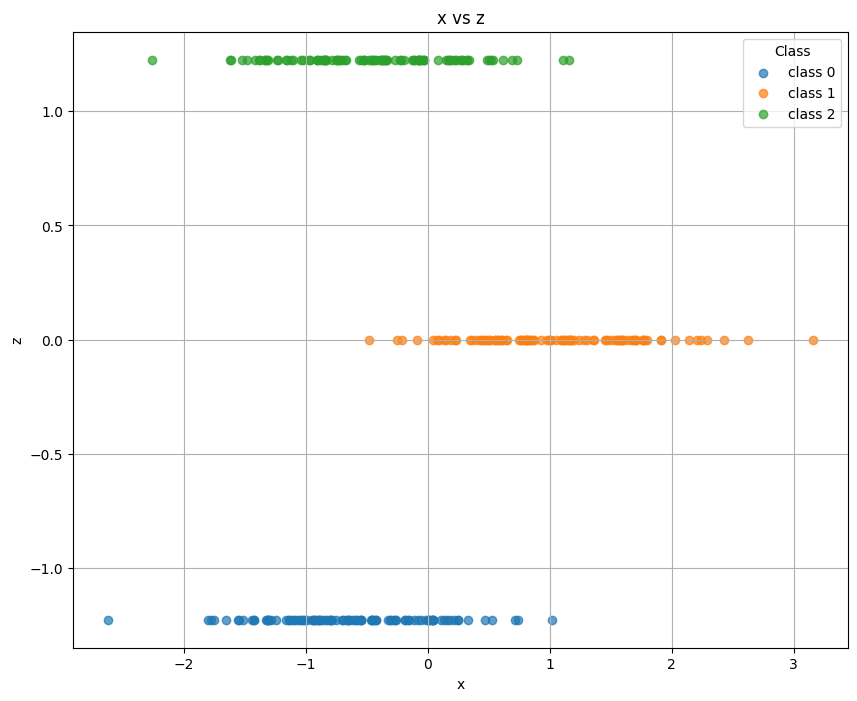

In [55]:
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(Xm[y == i, 0], Xm[y == i, 2], label=target_name, alpha=0.7)

plt.xlabel("x")
plt.ylabel("z")
plt.title("x vs z")
plt.legend(title="Class")
plt.grid(True)
plt.show()

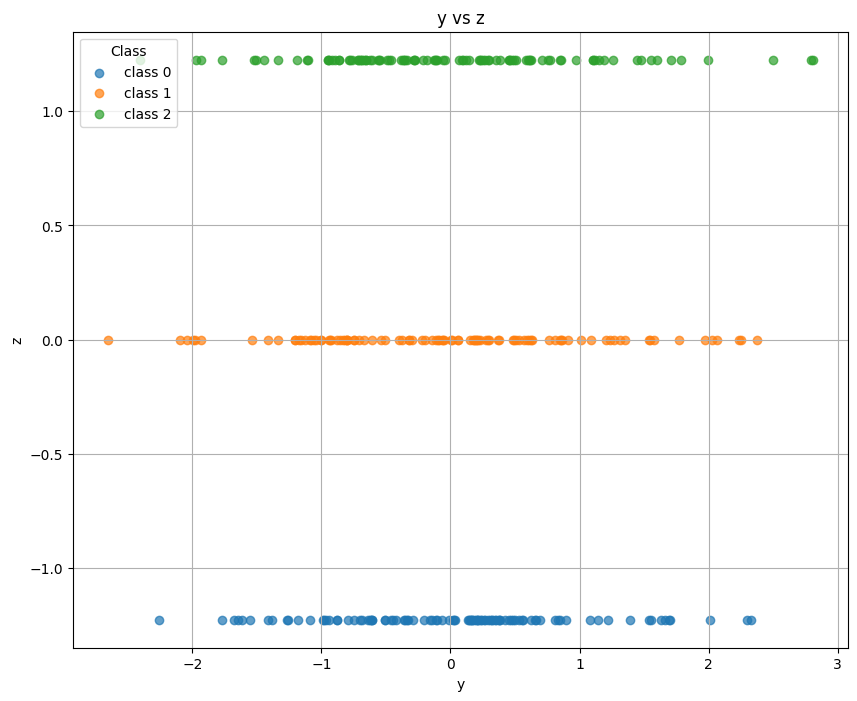

In [56]:
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(Xm[y == i, 1], Xm[y == i, 2], label=target_name, alpha=0.7)

plt.xlabel("y")
plt.ylabel("z")
plt.title("y vs z")
plt.legend(title="Class")
plt.grid(True)
plt.show()